<img src="http://www.ceic.org.ar/spanish/img/siisa-logo.jpg" align='right'>

# Identificación de variables de diferentes proveedores.

## Descripción del dataset:
Empiezo con la evaluación del cliente 136 (cuenta) puesto que en el grafo diseniado utiliza los 3 bureau de consulta (nosis, siisa y veraz). La politica seleccionda es la numero 10.
### Dataset cuenta (clientId113)
El data set fue tomado de la base de datos para el número de cliente 136 y la politica 10. El dataset completo consta de ~23000 registros para esa politica abarcando las fechas desde el 2017-02-01 al 2019-05-23. 

In [1]:
# importo las librerias que voy a utilizar.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
# Importo el/los dataset/s que se discuten en la seccion de "descripcion del dataset"
df1 = pd.read_csv("Client_113_Policy_10_20170201_20190523.cvs", low_memory=False)
df2 = pd.read_csv("Cliente_133_Policy_1_20181015_20190524.csv", low_memory=False)
df  = pd.concat([df1,df2], ignore_index=True)

C:\Users\elias\Programs\anaconda3\envs\siisa\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [3]:
# evalúo el tamanio del dataset.
df.shape

(52930, 487)

In [4]:
df.head(3)

,Alerta13_24,Alerta1_6,Alerta7_12,Alertas,ApellidoNombre,BCRA_Evol,CI,CIA12,CIA6,CII,...,veraz_peorSituacionBureau5a12m,veraz_peorSituacionBureau5m,veraz_peorSituacionBureau6m,veraz_peorSituacionBureau712m,veraz_peorSituacionBureauActual,veraz_peorStatus12,veraz_peorStatusActual,veraz_poblacion,veraz_score,veraz_validado
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Me pregunto si todos los registros tienen toda la misma politica a fin de hacer debug sobre la consulta sql.
df.policyId.unique()

array([10,  1], dtype=int64)

In [95]:
# Creo una columna que solo me diga si rechazo o califica spliteado el campo de decisionResult.
# Los strings son APROBADO o RECHAZAR un cliente en este caso serian OK, ERROR respectivamente.

#df['decision_filtered'] = df.decisionResult.str.split("|", n = 1, expand = True)[0]
#df['decision_filtered'][df['decision_filtered'].str.contains('(OK*|APROBADO*|ERROR*)')]


C:\Users\elias\Programs\anaconda3\envs\siisa\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


ValueError: cannot index with vector containing NA / NaN values

In [92]:
# Simplemente realizo un barplot para ver la distribucion de status de credito.
sns.set(style="whitegrid")
ax =sns.barplot(df.decision_filtered.value_counts().index, df.decision_filtered.value_counts().values/len(df.decision_filtered))
df.decision_filtered.value_counts()
# En este caso parece que error es sinonimo de no aprueba.

ValueError: min() arg is an empty sequence

In [8]:
# Me quedo con todas las instancias donde siisa veraz y nosis fueron evaluadas.
df=df[~((df.veraz_score.isna()) & (df.siisa_score.isna()) & (df.nosis_score.isna()))]

In [9]:
# No me interesa las instancias donde tengo ERROR o ESCALAMIENTO
df = df.drop(df[df.decision_filtered=='ADVERTENCIA'].index)
df = df.drop(df[df.decision_filtered=='Rechaza: Posee Sit. Irregulares.'].index)
df = df.drop(df[df.decision_filtered=='"Error nosis no valida identidad"'].index)
df = df.drop(df[df.decision_filtered=='Documento en base de denegados'].index)
df = df.drop(df[df.decision_filtered=='Error consultando Nosis empleador'].index)
df = df.drop(df[df.decision_filtered=='Rechaza: posee Sit. Irregular.'].index)

OK                                                                                                         18075
Rechaza por info NOSIS: Tiene al menos una Sit. mayor a 1 en (t)                                            8458
pide info extra                                                                                             8261
ERROR                                                                                                       5281
Rechaza: ingreso_F insuficiente                                                                             2980
APROBADO                                                                                                    2125
Rechaza por categorías de riesgo sin excepción                                                              1147
Rechaza: Score Veraz menor a 250                                                                             992
Rechaza por info NOSIS: Tiene al menos una Sit. mayor a 1 entre (t-1) y (t-2)                   

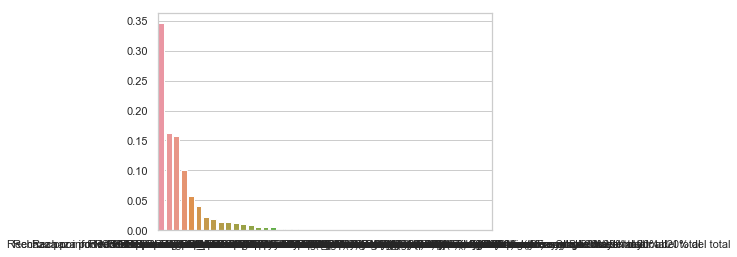

In [10]:
# Simplemente grafico la cantidad que pasa por califica o rechazo.
sns.set(style="whitegrid")
ax =sns.barplot(df.decision_filtered.value_counts().index, df.decision_filtered.value_counts().values/len(df.decision_filtered))
df.decision_filtered.value_counts()
# En este caso parece que error es sinonimo de no aprueba.

In [11]:
# Al final me tengo 23364 regristros que puedo evaluar.
df.shape

(52243, 488)

In [12]:
df.head(3)

,Alerta13_24,Alerta1_6,Alerta7_12,Alertas,ApellidoNombre,BCRA_Evol,CI,CIA12,CIA6,CII,...,veraz_peorSituacionBureau5m,veraz_peorSituacionBureau6m,veraz_peorSituacionBureau712m,veraz_peorSituacionBureauActual,veraz_peorStatus12,veraz_peorStatusActual,veraz_poblacion,veraz_score,veraz_validado,decision_filtered
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OK
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OK
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OK


## Correlación entre variables.
La idea de este apartado es poder generar algun mētodo a fin de evaluar la equivalencia de variables para los tres proveedores evaluados. Por ende simplemente me quedo con un subset de variables de los tres proveedores.

In [13]:
# Genero un dataframe  de un subset de columnas (variables de salida de los bureau's). 
df_variables_select = df.filter(regex=r'(siisa*|veraz*|nosis*)')
df_variables_select.shape

(52243, 319)

In [14]:
df_variables_select.head(3)

,nosisMesesAntiguedad,nosis_24mBCRAcant1,nosis_24mBCRAcantMora,nosis_24mBCRAmaxSit,nosis_24mBCRAmonto1,nosis_24mBCRAmontoMora,nosis_6mBCRAcant1,nosis_6mBCRAcantMora,nosis_6mBCRAmaxSit,nosis_6mBCRAmonto1,...,veraz_peorSituacionBureau5a12m,veraz_peorSituacionBureau5m,veraz_peorSituacionBureau6m,veraz_peorSituacionBureau712m,veraz_peorSituacionBureauActual,veraz_peorStatus12,veraz_peorStatusActual,veraz_poblacion,veraz_score,veraz_validado
2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# solo chequeo el tipo de variable.
for column in df_variables_select.columns:
    print(df_variables_select[column].dtype,column)

float64 nosisMesesAntiguedad
float64 nosis_24mBCRAcant1
float64 nosis_24mBCRAcantMora
float64 nosis_24mBCRAmaxSit
float64 nosis_24mBCRAmonto1
float64 nosis_24mBCRAmontoMora
float64 nosis_6mBCRAcant1
float64 nosis_6mBCRAcantMora
float64 nosis_6mBCRAmaxSit
float64 nosis_6mBCRAmonto1
float64 nosis_6mBCRAmontoMora
float64 nosis_AfipFech
float64 nosis_BCRAcant1
float64 nosis_BCRAcant2
float64 nosis_BCRAcant3
float64 nosis_BCRAcant4
float64 nosis_BCRAcant5
float64 nosis_BCRAcant6
float64 nosis_BCRAcantMora
float64 nosis_BCRAmaxSit
float64 nosis_BCRAmaxSit1m
float64 nosis_BCRAmaxSit2m
float64 nosis_BCRAmaxSit3m
float64 nosis_BCRAmaxSit4m
float64 nosis_BCRAmaxSit5m
float64 nosis_BCRAmonto1
float64 nosis_BCRAmonto2
float64 nosis_BCRAmonto3
float64 nosis_BCRAmonto3m
float64 nosis_BCRAmonto4
float64 nosis_BCRAmonto4m
float64 nosis_BCRAmonto5
float64 nosis_BCRAmonto5m
float64 nosis_BCRAmonto6
float64 nosis_BCRAmontoMora
float64 nosis_BCRAmontoMora3m
float64 nosis_BCRAmontoMora4m
float64 nosis_BCRA

In [16]:
borrar=df_variables_select.nosis_abonadosMonto12[~(df_variables_select.nosis_abonadosMonto12.isna())]

### Variables no categoricas.
Primero evaluo las variables del tipo no categoricas de modo tal de ver si existe alguna correlacion entre las mismas, simplemente calculando el coeficiente de variacion.

In [17]:
# Descarto todas las variables categoricas.
df_variables_cuant=df_variables_select.drop(df_variables_select.select_dtypes(['object','bool']), axis=1)

In [18]:
# Calculo la correlacion de todas las variables.
corr=df_variables_cuant.corr()

In [19]:
# procedimiento para separa la matriz cuadrada de correlaciones de modo de mejorar la visualizacion.
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]



In [20]:
# Imprimo las variables mas correlacionadas tomando un valor de corte igual a 0.6.

a=get_top_abs_correlations(df_variables_cuant, 10000)
# Elimino quedas aquellas que sean NAn.
a=a.dropna()
# cutoff de correlacion.
a_filter=a[abs(a.values) > 0.6]
# Guardo un archivo de correlacion.
a_filter.to_csv('corr_cliente 113-Politica10.csv', header=True)
rf=pd.read_csv('corr_cliente 113-Politica10.csv')
rf.columns = ['proveedor_1','proveedor_2', 'corr_value']
rf=rf[((rf.proveedor_1.str.contains('siisa', regex=True) & rf.proveedor_2.str.contains('veraz', regex=True)) | (rf.proveedor_1.str.contains('veraz', regex=True) & rf.proveedor_2.str.contains('siisa', regex=True)) | (rf.proveedor_1.str.contains('siisa', regex=True) & rf.proveedor_2.str.contains('nosis', regex=True)) | (rf.proveedor_1.str.contains('nosis', regex=True) & rf.proveedor_2.str.contains('siisa', regex=True)) | (rf.proveedor_1.str.contains('nosis', regex=True) & rf.proveedor_2.str.contains('veraz', regex=True)) | (rf.proveedor_1.str.contains('veraz', regex=True) & rf.proveedor_2.str.contains('nosis', regex=True)))]
rf.to_csv('corr_cliente 113-Politica10_fix.csv', header=True)
print("Top Absolute Correlations")
rf

Top Absolute Correlations


,proveedor_1,proveedor_2,corr_value
17,siisa_monto1s,veraz_bcraUltimoMonto,0.968727
50,nosis_BCRAmonto1,veraz_bcraUltimoMonto,0.901198
60,nosis_6mBCRAmonto1,veraz_bcraUltimoMonto,0.890571
80,nosis_BCRAmonto3m,veraz_bcraUltimoMonto,0.861471
81,nosis_consultas,siisa_cuitsCheques,0.861063
86,nosis_BCRAmonto3m,siisa_monto1s,0.852443
87,nosis_BCRAmonto5,siisa_monto5s,0.852007
94,nosis_BCRAcant4,siisa_cant4s,0.828780
98,nosis_BCRAmonto4m,veraz_bcraUltimoMonto,0.820711
100,nosis_BCRAmonto4,siisa_monto4s,0.819499


['siisa_monto1s', 'veraz_bcraUltimoMonto']


C:\Users\elias\Programs\anaconda3\envs\siisa\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


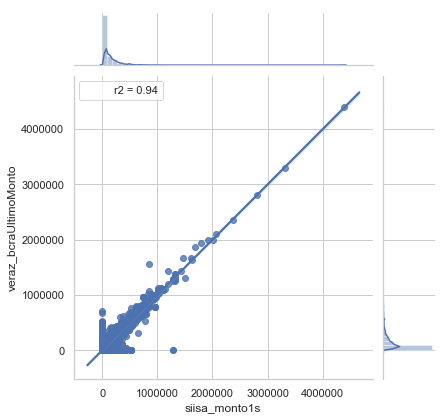

In [90]:
x   = 'siisa_monto1s'
y   = 'veraz_bcraUltimoMonto'
tup = [ x, y ]
print(tup)
comp= df_variables_cuant[[x, y]]
comp=comp.dropna()
comp.head()
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(df_variables_cuant[x], df_variables_cuant[y], kind="reg", stat_func=r2)

### Variables categoricas
Para este apartado a fin de evaluar la relacion entre variables categoricas utilizo el [coeficiente](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9) de incerteza basado 
en la entropia condicional. Las herramientas las podemos descargar de este [repo](https://github.com/shakedzy/dython).



In [22]:
from dython.nominal import associations, conditional_entropy, theils_u

In [23]:
# Descarto todas las variables categoricas.
# tengo que seguir con esto luego.
#df_variables_cat=df.drop(df_variables_select.select_dtypes(['float64']), axis=1)

In [24]:
#df_variables_cat.info()